# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = url+f'&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | les cayes
Processing Record 3 of Set 1 | ayan
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | vila
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | machalpur
Processing Record 12 of Set 1 | miroslovesti
Processing Record 13 of Set 1 | datong
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | brae
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | shelburne
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | pangnirtung
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | atuona
Processing Record 

Processing Record 36 of Set 4 | barbar
City not found. Skipping...
Processing Record 37 of Set 4 | tignere
Processing Record 38 of Set 4 | santa cruz
Processing Record 39 of Set 4 | shitanjing
Processing Record 40 of Set 4 | yerbogachen
Processing Record 41 of Set 4 | dikson
Processing Record 42 of Set 4 | ballina
Processing Record 43 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | boksitogorsk
Processing Record 46 of Set 4 | kaspiysk
Processing Record 47 of Set 4 | la asuncion
Processing Record 48 of Set 4 | piuma
Processing Record 49 of Set 4 | mount gambier
Processing Record 0 of Set 5 | caravelas
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | makakilo city
Processing Record 3 of Set 5 | vao
Processing Record 4 of Set 5 | houston
Processing Record 5 of Set 5 | colares
Processing Record 6 of Set 5 | pantai remis
Processing Record 7 of Set 5 | port hedland
Processing Record 8 of S

Processing Record 24 of Set 8 | gravdal
Processing Record 25 of Set 8 | roebourne
Processing Record 26 of Set 8 | yenagoa
Processing Record 27 of Set 8 | road town
Processing Record 28 of Set 8 | geraldton
Processing Record 29 of Set 8 | ozinki
Processing Record 30 of Set 8 | longyearbyen
Processing Record 31 of Set 8 | morehead
Processing Record 32 of Set 8 | kununurra
Processing Record 33 of Set 8 | nouadhibou
Processing Record 34 of Set 8 | sinnamary
Processing Record 35 of Set 8 | margate
Processing Record 36 of Set 8 | amahai
Processing Record 37 of Set 8 | alenquer
Processing Record 38 of Set 8 | coahuayana
Processing Record 39 of Set 8 | bradford
Processing Record 40 of Set 8 | chunskiy
Processing Record 41 of Set 8 | tabou
Processing Record 42 of Set 8 | sataua
City not found. Skipping...
Processing Record 43 of Set 8 | savelugu
Processing Record 44 of Set 8 | gubkinskiy
Processing Record 45 of Set 8 | gimli
Processing Record 46 of Set 8 | colesberg
Processing Record 47 of Set 

Processing Record 12 of Set 12 | kendari
Processing Record 13 of Set 12 | ust-kulom
Processing Record 14 of Set 12 | sam chuk
Processing Record 15 of Set 12 | tuatapere
Processing Record 16 of Set 12 | hervey bay
Processing Record 17 of Set 12 | metsavan
Processing Record 18 of Set 12 | zhangye
Processing Record 19 of Set 12 | behshahr
Processing Record 20 of Set 12 | dunedin
Processing Record 21 of Set 12 | sola
Processing Record 22 of Set 12 | opuwo
Processing Record 23 of Set 12 | aklavik
Processing Record 24 of Set 12 | coihaique
Processing Record 25 of Set 12 | flin flon
Processing Record 26 of Set 12 | kardla
Processing Record 27 of Set 12 | eureka
Processing Record 28 of Set 12 | adoni
Processing Record 29 of Set 12 | kinwat
Processing Record 30 of Set 12 | mehamn
Processing Record 31 of Set 12 | phan rang
City not found. Skipping...
Processing Record 32 of Set 12 | westport
Processing Record 33 of Set 12 | mayya
Processing Record 34 of Set 12 | davila
Processing Record 35 of Se

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_records(city_data)
# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,276.95,87,100,4.55,US,1675266309
1,les cayes,18.2000,-73.7500,302.08,49,5,2.70,HT,1675266311
2,ayan,56.4500,138.1667,249.41,72,94,4.75,RU,1675266314
3,rikitea,-23.1203,-134.9692,298.99,77,4,7.49,PF,1675266315
4,kapaa,22.0752,-159.3190,292.65,91,0,3.60,US,1675266106


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,276.95,87,100,4.55,US,1675266309
1,les cayes,18.2000,-73.7500,302.08,49,5,2.70,HT,1675266311
2,ayan,56.4500,138.1667,249.41,72,94,4.75,RU,1675266314
3,rikitea,-23.1203,-134.9692,298.99,77,4,7.49,PF,1675266315
4,kapaa,22.0752,-159.3190,292.65,91,0,3.60,US,1675266106


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

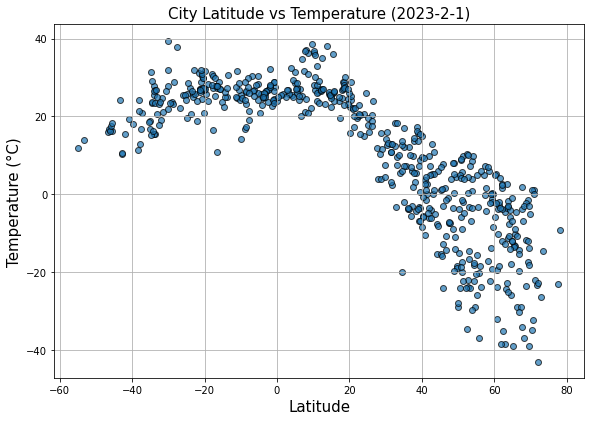

In [45]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots() 
ax.scatter(city_data_df['Lat'], (city_data_df['Max Temp']-273.15), alpha=0.7, edgecolors='black')

# Incorporate the other graph properties
fig.set_size_inches(9.5, 6.5)
ax.grid()
ax.set_title('City Latitude vs Temperature (2023-2-1)', fontsize=15)
ax.set_xlabel('Latitude', fontsize=15)
ax.set_ylabel('Temperature (°C)', fontsize=15)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

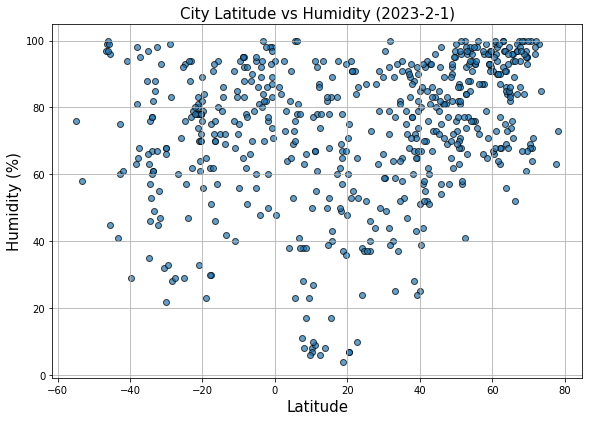

In [54]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots() 
ax.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.7, edgecolors='black')

# Incorporate the other graph properties
fig.set_size_inches(9.5, 6.5)
ax.grid()
ax.set_title('City Latitude vs Humidity (2023-2-1)', fontsize=15)
ax.set_xlabel('Latitude', fontsize=15)
ax.set_ylabel('Humidity (%)', fontsize=15)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

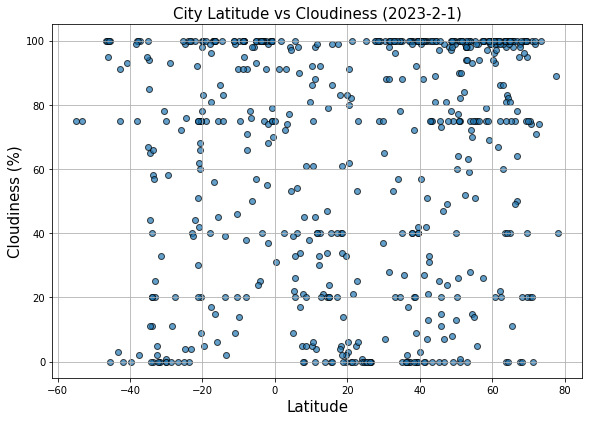

In [55]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots() 
ax.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.7, edgecolors='black')

# Incorporate the other graph properties
fig.set_size_inches(9.5, 6.5)
ax.grid()
ax.set_title('City Latitude vs Cloudiness (2023-2-1)', fontsize=15)
ax.set_xlabel('Latitude', fontsize=15)
ax.set_ylabel('Cloudiness (%)', fontsize=15)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

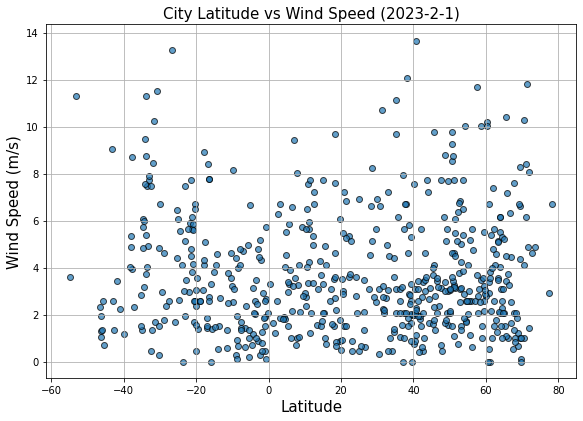

In [56]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots() 
ax.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.7, edgecolors='black')

# Incorporate the other graph properties
fig.set_size_inches(9.5, 6.5)
ax.grid()
ax.set_title('City Latitude vs Wind Speed (2023-2-1)', fontsize=15)
ax.set_xlabel('Latitude', fontsize=15)
ax.set_ylabel('Wind Speed (m/s)', fontsize=15)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [112]:
# Define a function to create Linear Regression plots
def regressionplots(x, y, xlabel, ylabel):    
    slope, intercept, r, p, std_err = linregress(x, y)
    print(f'The r-value is: {r}')
    
    fig, ax = plt.subplots()
    fig.set_size_inches(9.5, 6.5)
    ax.scatter(x, y)
    ax.plot(x, intercept + slope * x, color='r', label=f'y={round(slope, 2)}x+{round(intercept, 2)}')
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.legend(loc='best', fontsize=15)

    plt.show()

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,276.95,87,100,4.55,US,1675266309
1,les cayes,18.2000,-73.7500,302.08,49,5,2.70,HT,1675266311
2,ayan,56.4500,138.1667,249.41,72,94,4.75,RU,1675266314
4,kapaa,22.0752,-159.3190,292.65,91,0,3.60,US,1675266106
5,vila,42.0304,-8.1588,282.98,52,7,1.52,PT,1675266317


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,rikitea,-23.1203,-134.9692,298.99,77,4,7.49,PF,1675266315
6,cidreira,-30.1811,-50.2056,300.86,68,1,4.84,BR,1675266318
7,new norfolk,-42.7826,147.0587,283.55,60,91,1.34,AU,1675266319
8,punta arenas,-53.1500,-70.9167,287.21,58,75,11.32,CL,1675266314
9,mataura,-46.1927,168.8643,289.78,100,100,1.30,NZ,1675266321


###  Temperature vs. Latitude Linear Regression Plot

-0.840831861098224
The r-value is: -0.8408318610982243


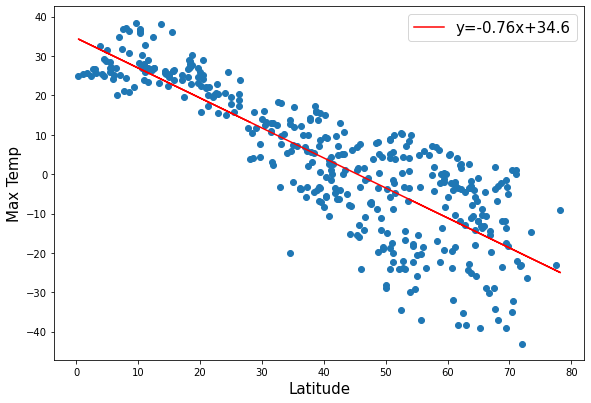

In [121]:
# Linear regression on Northern Hemisphere
regressionplots(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp']-273.15,
    'Latitude',
    'Max Temp'
)

0.4571960758107294
The r-value is: 0.45719607581072924


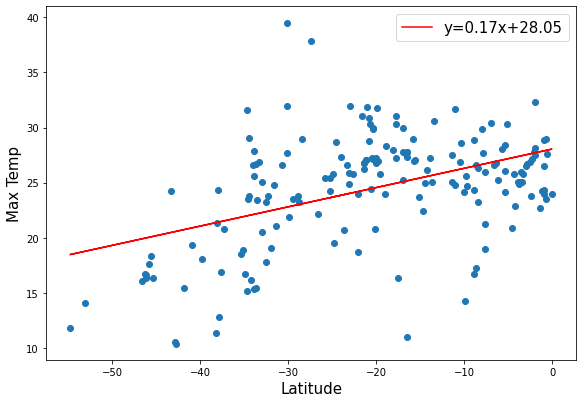

In [120]:
# Linear regression on Southern Hemisphere
regressionplots(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp']-273.15,
    'Latitude',
    'Max Temp'
)

**Discussion about the linear relationship:** There is a highly negative corralation between temperature and distance from the equator in the northern hemisphere. The farther a city is from the equator; the colder it gets. the southern hemisphere feels the same effect, but there is a slightly lesser corralation.

### Humidity vs. Latitude Linear Regression Plot

0.4887958963510096
The r-value is: 0.4887958963510097


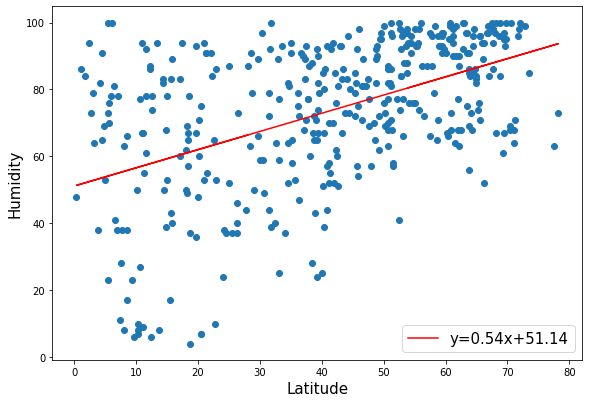

In [119]:
# Northern Hemisphere
regressionplots(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    'Latitude',
    'Humidity'
)

0.19110973402741527
The r-value is: 0.19110973402741524


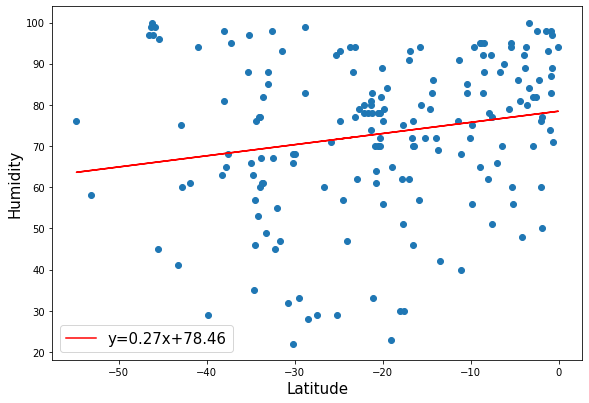

In [118]:
# Southern Hemisphere
regressionplots(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    'Latitude',
    'Humidity'
)

**Discussion about the linear relationship:** There is very little evidence that humidity is related to distance from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

0.3279344541843577
The r-value is: 0.32793445418435774


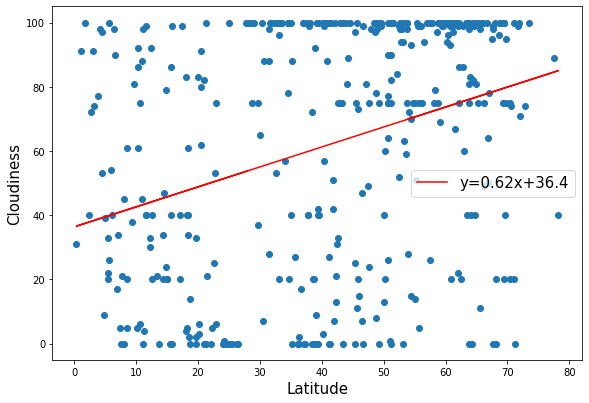

In [114]:
# Northern Hemisphere
regressionplots(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    'Latitude',
    'Cloudiness'
)

0.25562542928472176
The r-value is: 0.25562542928472143


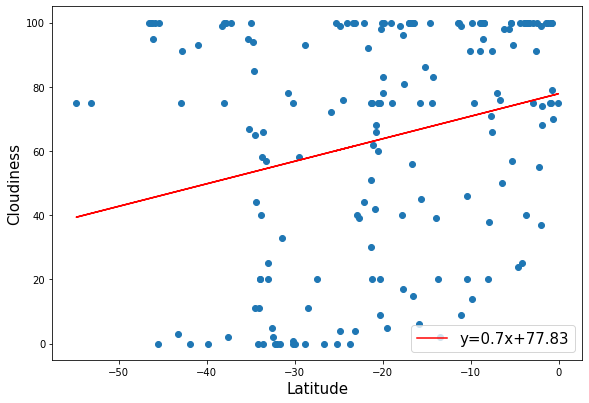

In [115]:
# Southern Hemisphere
regressionplots(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    'Latitude',
    'Cloudiness'
)

**Discussion about the linear relationship:** Cloudiness also seems to have negligible correlation with latitude.

### Wind Speed vs. Latitude Linear Regression Plot

0.04125075357530544
The r-value is: 0.041250753575305485


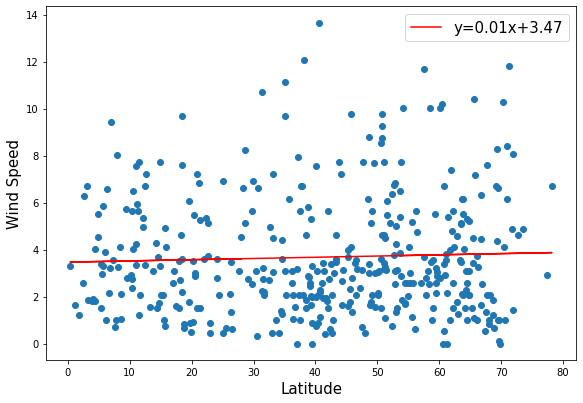

In [117]:
# Northern Hemisphere
regressionplots(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    'Latitude',
    'Wind Speed'
)

-0.29896099447363556
The r-value is: -0.29896099447363544


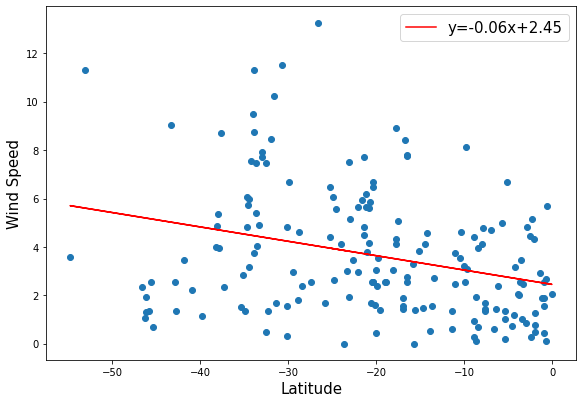

In [116]:
# Southern Hemisphere
regressionplots(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    'Latitude',
    'Wind Speed'
)

**Discussion about the linear relationship:** Wind speed also does not corralate with latitude.